# L3: Text clustering and topic modelling

Text clustering groups documents in such a way that documents within a group are more &lsquo;similar&rsquo; to other documents in the cluster than to documents not in the cluster. The exact definition of what &lsquo;similar&rsquo; means in this context varies across applications and clustering algorithms.

In this lab you will experiment with both hard and soft clustering techniques. More specifically, in the first part you will be using the $k$-means algorithm, and in the second part you will be using a topic model based on the Latent Dirichlet Allocation (LDA).

## Hard clustering data set

The raw data for the hard clustering part of this lab is a collection of product reviews. We have preprocessed the data by tokenization and lowercasing.

In [1]:
import pandas as pd
import bz2

with bz2.open("reviews.json.bz2") as source:
    df = pd.read_json(source)

When you inspect the data frame, you can see that there are three labelled columns: `category` (the product category), `sentiment` (whether the product review was classified as &lsquo;positive&rsquo; or &lsquo;negative&rsquo; towards the product), and `text` (the space-separated text of the review).

In [6]:
df.head()

,category,sentiment,text
0,music,neg,i bought this album because i loved the title ...
1,music,neg,i was misled and thought i was buying the enti...
2,books,neg,"i have introduced many of my ell , high school..."
3,books,pos,anything you purchase in the left behind serie...
4,dvd,pos,"i loved these movies , and i cant wiat for the..."


## Problem 1: K-means clustering

Your first task is to cluster the product review data using a tf–idf vectorizer and a $k$-means clusterer.

Start by doing the vectorization. In connection with vectorization, you should also filter out standard English stop words. While you could use [spaCy](https://spacy.io/) for this task, here it suffices to use the word list implemented in [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

In [7]:
# TODO: Enter code here to vectorize the data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
reviews = vectorizer.fit_transform(df["text"])

Test your vectorization by running the following code cell:

In [8]:
reviews.shape

(11914, 46619)

In [10]:
reviews

<11914x46619 sparse matrix of type '<class 'numpy.float64'>'
	with 579847 stored elements in Compressed Sparse Row format>

If you used the English stop word list from scikit-learn, then the resulting vocabulary should have 46,619 entries.

Next, cluster the vectorized data. Before doing so, you should read the documentation of the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class, which is scikit-learn&rsquo;s implementation of the $k$-means algorithm. As you can see, this class has several parameters that you can tweak. For now, the only parameter that you will have to set is the number of clusters. We recommend that you choose $k=3$.

**Tip:** Training $k$-means models will take some time. To speed things up, you can use the `n_init` parameter to control the number of times that the clustering is re-computed with different initial values. The default value for this parameter is 10; here and in the rest of this lab, you may want to set this to a lower value.

In [44]:
# TODO: Enter code here to cluster the vectorized data
from sklearn.cluster import KMeans

#for 3 clusters
kmeans3 = KMeans(n_clusters=3,n_init=3).fit(reviews)
kmeans3labels = kmeans3.labels_

To sanity-check your clustering, create a bar plot with the number of documents per cluster.

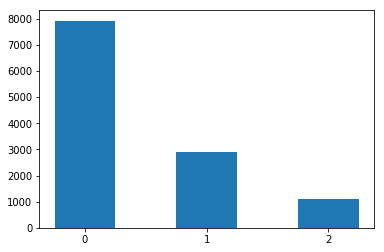

In [45]:
# TODO: Enter code here to produce a bar plot of the cluster size
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

labels, values = zip(*Counter(kmeans3labels).items())

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
plt.xticks(indexes , labels)
plt.show()

Note that sizes may vary considerable between clusters and among different random seeds.

## Problem 2: Summarize clusters

Once you have a clustering, you can try to see whether it is meaningful. One useful technique in that context is to generate a **summary** for each cluster by extracting the $n$ highest-weighted terms from the centroid of each cluster. Your next task is to implement this approach.

**Hint:** You will need to construct an &lsquo;inverted vocabulary&rsquo; that allows you to map from the index of a term back to the original term.

In [46]:
# TODO: Enter code here to compute the cluster summaries and print them
centroids = kmeans3.cluster_centers_
#Cluster 0
indexCentroid0 = (-centroids[0]).argsort()[:10]
for i in indexCentroid0:
    print (vectorizer.get_feature_names()[i])

product
like
great
cd
just
use
album
good
time
does


In [47]:
#Cluster 1
indexCentroid1 = (-centroids[1]).argsort()[:10]
for i in indexCentroid1:
    print (vectorizer.get_feature_names()[i])

book
movie
quot
film
read
story
like
just
good
great


In [48]:
#Cluster 2
indexCentroid2 = (-centroids[2]).argsort()[:10]
for i in indexCentroid2:
    print (vectorizer.get_feature_names()[i])

camera
lens
pictures
canon
digital
use
flash
battery
quality
great


Once you have computed the cluster summaries, discuss their quality. Is it clear what the reviews in a given cluster are about? Which clusters are clearest? Which are less clear? Do the cluster summaries contain any unexpected terms? What happens if you re-cluster with, say, $k=6$?

*TODO: Insert your analysis of the clusters here*

For k=3 clusters:
The last 2 clusters seem to give some clear information about the cluster. The first cluster seems to be less clear. The first cluster contains some unexpected terms like album,cd. 
For k=6 clusters:
The terms seem to define the clusters more clearly. The terms give a good summary of what the clusters are about.

In [31]:
#for 6 clusters
kmeans6 = KMeans(n_clusters=6,n_init=5).fit(reviews)
kmeans6labels = kmeans6.labels_
centroidsk6 = kmeans6.cluster_centers_

In [32]:
#Cluster 0
indexCentroid0k6 = (-centroidsk6[0]).argsort()[:10]
for i in indexCentroid0k6:
    print (vectorizer.get_feature_names()[i])

product
use
great
just
like
good
does
software
time
work


In [33]:
#Cluster 1
indexCentroid1k6 = (-centroidsk6[1]).argsort()[:10]
for i in indexCentroid1k6:
    print (vectorizer.get_feature_names()[i])

movie
film
movies
like
story
watch
just
good
great
acting


In [34]:
#Cluster 2
indexCentroid2k6 = (-centroidsk6[2]).argsort()[:10]
for i in indexCentroid2k6:
    print (vectorizer.get_feature_names()[i])

camera
lens
pictures
canon
digital
use
flash
battery
quality
great


In [35]:
#Cluster 3
indexCentroid3k6 = (-centroidsk6[3]).argsort()[:10]
for i in indexCentroid3k6:
    print (vectorizer.get_feature_names()[i])

book
read
books
author
reading
story
like
just
written
good


In [36]:
#Cluster 4
indexCentroid4k6 = (-centroidsk6[4]).argsort()[:10]
for i in indexCentroid4k6:
    print (vectorizer.get_feature_names()[i])

album
cd
music
songs
song
like
just
great
band
good


In [37]:
#Cluster 5
indexCentroid5k6 = (-centroidsk6[5]).argsort()[:10]
for i in indexCentroid5k6:
    print (vectorizer.get_feature_names()[i])

quot
book
cd
album
music
just
like
song
best
great


## Problem 3: Tune the k-means algorithm

A major limitation of the $k$-means algorithm is that one has to manually set the value for $k$, the number of clusters. One heuristic that can help you with this is the [Elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). Your next task is to implement this method to see whether it allows you to find a better value for $k$.

To follow the elbow method, you should plot different values of $k$ against the **inertia** (sums of squared distances between documents and closest centroids) of the fitted $k$-means model, and pick the $k$ at the &lsquo;elbow point&rsquo; of the resulting graph. Test cluster sizes between 1 and 9.

**Note that this will take a while.**

In [38]:
# TODO: Enter code here to generate the plot for the elbow method
inertialist = []
kmeanslabels = []
for x in range(1,10):
    kmeans = KMeans(n_clusters=x,n_init=10).fit(reviews)
    kmeanslabel = kmeans.labels_
    kmeanslabels.append(kmeanslabel)
    inertias = kmeans.inertia_
    inertialist.append(inertias)

<function matplotlib.pyplot.show(*args, **kw)>

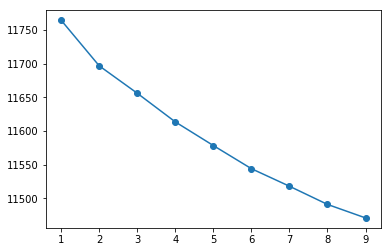

In [39]:
import matplotlib.pyplot as plt
#Elbow method
plt.plot(range(1,10),inertialist,'-o')
plt.show

Once you have the diagram, can you see a pronounced &lsquo;elbow point&rsquo;? Discuss your findings in a short text.

*TODO: Insert your discussion of the elbow method here*

There seems to appear a very small elbow point for k=6 i.e. when the whole data is divided into 6 clusters. This means that the sum of distances from each vector to its nearest centroid vector is lowest when the whole data is clustered into 6 clusters. This can be cross-verified by checking the actual number of clusters(unique categories) or gold-standard class labels that is available in the given data.

## Problem 4: Compare clusterings using the Rand index

In some scenarios, you may have gold-standard class labels available for at least a subset of your documents. In these cases you can compute the **Rand index** of a clustering, and use this measure to compare the quality of different clusterings.

To compute the Rand index, we view a clustering as a binary classifier on pairs of documents. The classifier predicts &lsquo;positive&rsquo; if and only if the two documents belong to the same cluster. The (non-normalized) Rand index of the clustering is the accuracy of this classifier relative to a reference in which a document pair belongs to the &lsquo;positive&rsquo; class if and only if the two documents in the pair have the same gold-standard class label.

Compare a clustering with $k=3$ clusters to a second clustering with $k=6$ clusters. As your evaluation data, use the first 500 documents from the original data set along with their gold-standard categories (from the `category` column). What do you observe? How do you interpret your observations? What arguments can you find against the Rand index as a measure for comparing clusterings?

In [186]:
# TODO: Enter code here to compute the Rand indices for the two clusterings
from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np

#gold-standard labels
dfcategory = df["category"][:500]
d = dict([(y,x) for x,y in enumerate(sorted(set(dfcategory)))]) #map unique cluster labels to numbers
goldstdlabels500 = np.asarray([d[x] for x in dfcategory]) #first 500 gold-standard class labels

In [187]:
#clustering with k=3
predlabelk3 = kmeans3labels[:500] #firsts 500 predicted class labels from fitted k-means model from problem 1
ri_3 = adjusted_rand_score(goldstdlabels500,predlabelk3)
ri_3 #rand index

0.08399448637656193

In [188]:
#clustering with k=6
predlabelk6 = kmeanslabels[5][:500] #firsts 500 predicted class labels from fitted k-means model from problem 3
ri_6 = adjusted_rand_score(goldstdlabels500,predlabelk6)
ri_6 #rand index

0.22766052146678806

*TODO: Insert your discussion of your results here*

For k=3:
The Rand index for clustering where k=3 was observed to be 0.084 which is pretty low since the actual number of clusters is 6 but 3 clusters are considered here so the probability of more pairs of data points not being classified as one class is very high. The numerator in the Rand index is the sum of true positives and true negatives. The denomenator is the sum of all possible outcomes of a confusion matrix. Here the denomenator is verz high compared to the numerator hence leading to verz low Rand index. 
For k=6:
The Rand index for clustering where k=6 was observed to be 0.227 which is higher than that of k=3 since the actual number of clusters is 6 itself. When the number of clusters are the same in the given data and the fitted model, the probability of a pair of data points being classified as one class is higher. Due to the increase in the count of True positives and true negatives there is an increase in Rand index.

## Topic modelling data set

The data set for the topic modelling part of this lab is the collection of all [State of the Union](https://en.wikipedia.org/wiki/State_of_the_Union) addresses from the years 1975–2000. These speeches come as a single text file with one sentence per line. The following code cell prints the first 5 lines from the data file:

In [79]:
with open("sotu_1975_2000.txt") as source:
    for i, line in enumerate(source):
        print(line.rstrip())
        if i >= 5:
            break

mr speaker mr vice president members of the 94th congress and distinguished guests
twenty six years ago a freshman congressman a young fellow with lots of idealism who was out to change the world stood before sam rayburn in the well of the house and solemnly swore to the same oath that all of you took yesterday an unforgettable experience and i congratulate you all
two days later that same freshman stood at the back of this great chamber over there someplace as president truman all charged up by his single handed election victory reported as the constitution requires on the state of the union
when the bipartisan applause stopped president truman said i am happy to report to this 81st congress that the state of the union is good our nation is better able than ever before to meet the needs of the american people and to give them their fair chance in the pursuit of happiness it is foremost among the nations of the world in the search for peace
today that freshman member from michigan stan

## Problem 5: Train a topic model

Your first task on the topic modelling data is to train an LDA model. For this task you will be using [spaCy](https://spacy.io/) and the [gensim](https://radimrehurek.com/gensim/) topic modelling library.

Start by preprocessing the data using spaCy. Given that the data set for this problem is rather small, you do not have to exclude any components from the standard pipeline. Filter out stop words, non-alphabetic tokens, and tokens less than 3 characters in length. Store the documents as a nested list where the first level of nesting corresponds to the sentences and the second level corresponds to the tokens in each sentence.

In [236]:
# TODO: Replace the following lines with your own code for preprocessing the documents

#import spacy
#nlp = spacy.load("en_core_web_sm", disable=["tagger","parser"])

#with open("sotu_1975_2000.txt") as source:
#    documents = []
#    lines = []
#    i = 0
#    for line in source:
#        line_strings = line.split()
#        line_string = [element for element in line_strings]
#        for token in nlp(str(line_string)):   
#            if token.text.isalpha and len(token)>=3 and token.is_stop is False :
#                lines.append(token.lower_)
#        documents.insert(i,lines)
#        #documents[i] = lines
#        i += 1

In [247]:
with open("sotu_1975_2000.txt") as source:
    documents = [line.split() for line in source]
    
import spacy
nlp = spacy.load("en_core_web_sm", disable=["tagger","parser"])

for i in range(len(documents)):
    lines = []
    document = nlp(str(documents[i]))
    for token in document:
        if token.is_stop is False and token.text.isalpha() and len(token)>=3:
            lines.append(token.lower_)
    documents[i] = lines  

Test your preprocessing by running the following cell:

In [250]:
" ".join(documents[42])

'reduce oil imports million barrels day end year million barrels day end'

You should get the following output:

Once you have the list of documents, skim the section [Pre-process and vectorize the documents](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#pre-process-and-vectorize-the-documents) of the gensim documentation to learn how to create the dictionary and the vectorized corpus representation required by gensim. (Note that you cannot use the standard scikit-learn pipeline in this case.) Then, write code to train an [LdaModel](https://radimrehurek.com/gensim/models/ldamodel.html) for $k=10$ topics, and using default values for all other parameters.

In [256]:
# TODO: Enter code here to train an LDA model
import gensim
from gensim.corpora import Dictionary

docs = documents
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [267]:
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
eval_every = None # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    alpha='auto',
    eta='auto',
    num_topics=num_topics,
    eval_every=eval_every
)

In [268]:
model.print_topics()

[(0,
  '0.016*"america" + 0.007*"states" + 0.007*"new" + 0.007*"ask" + 0.006*"year" + 0.006*"united" + 0.005*"peace" + 0.005*"nuclear" + 0.005*"congress" + 0.005*"covenant"'),
 (1,
  '0.012*"years" + 0.012*"america" + 0.012*"world" + 0.011*"year" + 0.011*"new" + 0.008*"nation" + 0.007*"congress" + 0.006*"people" + 0.006*"century" + 0.006*"budget"'),
 (2,
  '0.012*"new" + 0.011*"years" + 0.009*"work" + 0.009*"congress" + 0.009*"americans" + 0.008*"people" + 0.008*"america" + 0.007*"american" + 0.007*"government" + 0.006*"welfare"'),
 (3,
  '0.017*"tax" + 0.010*"people" + 0.009*"help" + 0.009*"new" + 0.008*"need" + 0.007*"congress" + 0.006*"year" + 0.006*"security" + 0.005*"billion" + 0.005*"hard"'),
 (4,
  '0.013*"people" + 0.010*"work" + 0.009*"let" + 0.008*"world" + 0.007*"know" + 0.007*"americans" + 0.006*"new" + 0.005*"trade" + 0.005*"government" + 0.005*"support"'),
 (5,
  '0.012*"new" + 0.012*"schools" + 0.011*"help" + 0.011*"teachers" + 0.008*"people" + 0.007*"america" + 0.007*"c

Inspect the topics. Do they make sense? Can you &lsquo;label&rsquo; each topic with a short description of what it is about? Do the topics contain any unexpected terms? Summarize your discussion in a short text.

*TODO: Insert your discussion of the topics here*
Not all topic makes sense. Though we get the most important words it does not say what the topic is about in detail or completely.
Topic 0: Talks something related to Nuclear weapons or Nuclear deals and maintaining peace through nuclear deals
Topic 1: Talks something about the budget in the country and its effect on people
Topic 2: Talks something about the welfare of people
Topic 3: Talks something about the taxes in the country and the security of its people
Topic 4: Talks something about the government's new trade rules 
Topic 5: Talks something about schools for cummnities and how it helps people
Topic 6: Talks something about children but is not clear
Topic 7: Talks about child health, security
Topic 8: Not clear what the topic is about
Topic 9: Talks about children health and parents

## Problem 6: Monitoring a topic model for convergence

When learning an LDA model, it is important to make sure that the training algorithm has converged to a stable posterior distribution. One way to do so is to plot, after each training epochs(or &lsquo;pass&rsquo;, in gensim parlance) the log likelihood of the training data under the posterior. Your last task in this lab is to create such a plot and, based on this, to suggest an appropriate number of epochs.

To collect information about the posterior likelihood after each pass, we need to enable the logging facilities of gensim. Once this is done, gensim will add various diagnostics to a log file `gensim.log`.

In [269]:
import logging

logging.basicConfig(filename="gensim.log", format="%(asctime)s:%(levelname)s:%(message)s", level=logging.INFO)

The following function will parse the generated logfile and return the list of log likelihoods.

In [270]:
import re

def parse_logfile():
    matcher = re.compile("(-*\d+\.\d+) per-word .* (\d+\.\d+) perplexity")
    likelihoods = []
    with open("gensim.log") as source:
        for line in source:
            match = matcher.search(line)
            if match:
                likelihoods.append(float(match.group(1)))
    return likelihoods

In [ ]:
# TODO: Enter code here to generate the convergence plot

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    alpha='auto',
    eta='auto',
    num_topics=10,
    passes = 50,
    eval_every=1
)

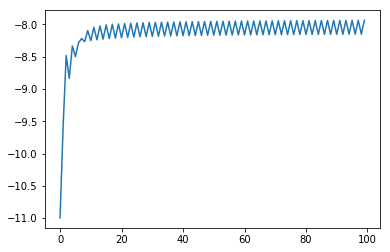

In [303]:
import matplotlib.pyplot as plt

plt.plot(parse_logfile())

Your task now is to re-train your LDA model for 50&nbsp;passes, retrieve the list of log likelihoods, and create a plot from this data.

How do you interpret your plot? What would be a reasonable choice for the number of passes? Retrain your LDA model with that number and re-inspect the topics it finds. Do you consider the new topics to be &lsquo;better&rsquo; than the ones that you got from the 1-pass model in Problem&nbsp;5?

*TODO: Insert your discussion of these questions here*

The log liklihood increases with the increase in passes and the plot seems to converge after roughly 30 passes i.e. the log liklihood remains constant after 30 passes. 30 would be the reasonable choice for the number of passes.

The new topics generated by the LDA model which is trained using 30 passes seems to be better than 1-pass model in Problem 5 since the topics generated give a much clear picture of the context and does not include non informative words like before.

In [308]:
# retraining LDA model with 30 passes
model_30 = LdaModel(
    corpus=corpus,
    id2word=id2word,
    alpha='auto',
    eta='auto',
    num_topics=10,
    passes = 30,
    eval_every=1
)

In [309]:
model_30.print_topics()

[(0,
  '0.017*"tax" + 0.014*"years" + 0.014*"year" + 0.014*"budget" + 0.014*"health" + 0.013*"care" + 0.009*"million" + 0.009*"new" + 0.009*"jobs" + 0.009*"families"'),
 (1,
  '0.016*"people" + 0.014*"work" + 0.013*"america" + 0.011*"children" + 0.010*"let" + 0.009*"know" + 0.009*"americans" + 0.008*"congress" + 0.008*"american" + 0.008*"help"'),
 (2,
  '0.012*"drugs" + 0.009*"children" + 0.008*"people" + 0.008*"war" + 0.007*"drug" + 0.006*"bosnia" + 0.005*"arms" + 0.005*"congress" + 0.005*"weapons" + 0.004*"help"'),
 (3,
  '0.039*"world" + 0.032*"america" + 0.017*"new" + 0.015*"peace" + 0.015*"freedom" + 0.014*"economy" + 0.013*"nation" + 0.012*"american" + 0.011*"trade" + 0.010*"people"'),
 (4,
  '0.014*"government" + 0.013*"federal" + 0.009*"house" + 0.008*"education" + 0.008*"administration" + 0.008*"business" + 0.007*"senate" + 0.006*"majority" + 0.006*"reform" + 0.006*"minority"'),
 (5,
  '0.011*"federal" + 0.010*"administration" + 0.009*"national" + 0.008*"government" + 0.008*"c

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>